In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading Data
loan1=pd.read_csv('/content/drive/MyDrive/Data Brio academy/loan_prediction_train.csv')
loan1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


There are 614 rows and 13 columns once the data has been loaded.

In [ ]:
# Drop Loan_ID
loneid_drop = loan1.drop(columns = 'Loan_ID', axis = 1)
loan1 = loneid_drop.copy()
loan1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan1.shape

(614, 12)

In [ ]:
loan1.rename(columns = {'ApplicantIncome': 'Applicant_Income', 'CoapplicantIncome':
                        'Co_Applicant_Income', 'LoanAmount': 'Loan_Amount',}, inplace=True)
loan1.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Applicant_Income', 'Co_Applicant_Income', 'Loan_Amount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
loan1.dtypes

,0
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
Applicant_Income,int64
Co_Applicant_Income,float64
Loan_Amount,float64
Loan_Amount_Term,float64
Credit_History,float64


We can observe from the data type that the numeric data types are Applicant Income, Co Applicant Income, Loan Amount, Loan Amount Term, and Credit History. The object data type applies to the remaining variables.


In [ ]:
loan1[loan1.duplicated() == True]

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


All the entries of this data set are unique.

In [ ]:
loan1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               601 non-null    object 
 1   Married              611 non-null    object 
 2   Dependents           599 non-null    object 
 3   Education            614 non-null    object 
 4   Self_Employed        582 non-null    object 
 5   Applicant_Income     614 non-null    int64  
 6   Co_Applicant_Income  614 non-null    float64
 7   Loan_Amount          592 non-null    float64
 8   Loan_Amount_Term     600 non-null    float64
 9   Credit_History       564 non-null    float64
 10  Property_Area        614 non-null    object 
 11  Loan_Status          614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


A few of the columns contain missing values, meaning that there are less than 614 non-null items in them.

In [ ]:
# Description of the data
loan1.describe()

,Applicant_Income,Co_Applicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


The candidates' average annual salary is almost $54,000. Its values span a wide range, from 150 to 81000.

The co-applicant's average salary is significantly less than the applicant's, at around $1,600.

The loan term's 25th, 50th, and 75th percentile values are 360 months, or 30 years. This suggests that 30 year terms make up the bulk of the house loans in this dataset.

A loan of $1,4000 is the typical amount. Its range of values is wide.

## Missing Value Analysis

In [ ]:
# Number of missing values
loan1.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
Applicant_Income,0
Co_Applicant_Income,0
Loan_Amount,22
Loan_Amount_Term,14
Credit_History,50


In [ ]:
# Fill missing values with random choice
categorical_variables = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']  #List of columns in the DataFrame that contain categorical data (non-numeric).
numerical_variables = ['Loan_Amount', 'Loan_Amount_Term']                                        #List of columns in the DataFrame that contain numerical data.

def find_missing_values(loan1, categorical_variables, Numerical_variables):      #find_missing_values: A function that takes a DataFrame (loan1) and two lists of variables (categorical and numerical) to handle missing values.
   for variable in categorical_variables:
       non_missing_variable = loan1[variable].dropna()                           #non_missing_variable: Extract non-missing values from the column.
       if not non_missing_variable.empty:
           value_counts = non_missing_variable.value_counts(normalize=True)      #value_counts: Calculate the frequency distribution of the non-missing values, normalized to probabilities.
           random_choice = np.random.choice(value_counts.index, size = len(loan1[variable]), p=value_counts.values)    #random_choice: Generate random choices from the unique values, using the calculated probabilities.
                                                                                                                       #np.random.choice: The function is used to randomly sample values according to the specified probabilities.
                                                                                                                       #**loan1[variable].fillna:** Fill missing values in the column with the randomly chosen values.
                                                                                                                       #pd.Seriesis used to ensure the indices align correctly with the original DataFrame.
           loan1[variable] = loan1[variable].fillna(pd.Series(random_choice, index = loan1.index))

   for variable in numerical_variables:
       median_value = loan1[variable].median()                                   #median_value: Calculate the median of the non-missing values in the column.
       loan1[variable] = loan1[variable].fillna(median_value)                    #loan1[variable].fillna: Fill missing values in the column with the median value.

   return loan1

loan1 = find_missing_values(loan1, categorical_variables, numerical_variables)   #**loan1 = find_missing_values(...):** Calls the function with the DataFrame loan1 and the lists of categorical and numerical variables. The result is stored back in loan1.
print(loan1)


     Gender Married Dependents     Education Self_Employed  Applicant_Income  \
0      Male      No          0      Graduate            No              5849   
1      Male     Yes          1      Graduate            No              4583   
2      Male     Yes          0      Graduate           Yes              3000   
3      Male     Yes          0  Not Graduate            No              2583   
4      Male      No          0      Graduate            No              6000   
..      ...     ...        ...           ...           ...               ...   
609  Female      No          0      Graduate            No              2900   
610    Male     Yes         3+      Graduate            No              4106   
611    Male     Yes          1      Graduate            No              8072   
612    Male     Yes          2      Graduate            No              7583   
613  Female      No          0      Graduate           Yes              4583   

     Co_Applicant_Income  Loan_Amount  

In [ ]:
loan1.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
Applicant_Income,0
Co_Applicant_Income,0
Loan_Amount,0
Loan_Amount_Term,0
Credit_History,0


## Exploratory Data Analysis

Gender
Male      498
Female    116
Name: count, dtype: int64
Married
Yes    399
No     215
Name: count, dtype: int64
Dependents
0     357
2     103
1     102
3+     52
Name: count, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
No     531
Yes     83
Name: count, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


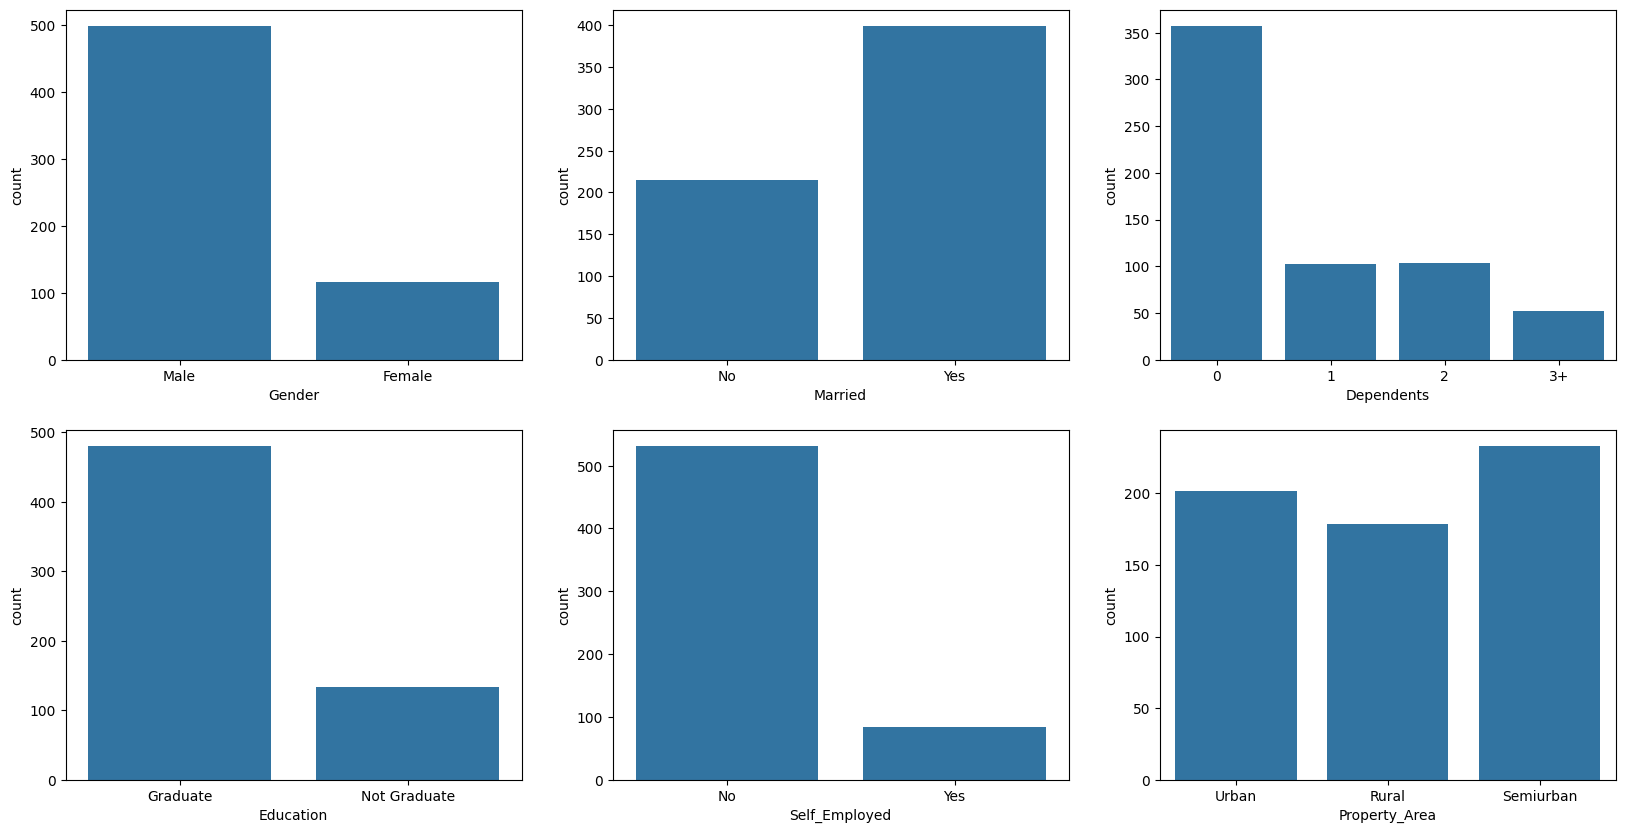

In [ ]:
# Univariate Analysis
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))       #fig: The figure object that contains all the subplots, axes: A 2D numpy array of axes objects, one for each subplot.
                                                                   #nrows=2 specifies that the grid will have 2 rows, ncols=3 specifies that the grid will have 3 columns
                                                                   #figsize=(20, 10) sets the size of the entire figure to 20 inches wide and 10 inches tall.
Gender_counts = (loan1['Gender'].value_counts())                   #how many times each unique value appears in the Gender column of the DataFrame loan1
print(Gender_counts)
sns.countplot(x='Gender', data=loan1, ax = axes[0, 0])             #create a count plot (bar plot) that shows the number of occurrences of each unique value in the Gender column.
                                                                   #data=loan1:Indicates that the data for the plot comes from the loan1 DataFrame
                                                                   #x='Gender':Specifies that the x-axis should represent the Gender column
                                                                   #ax=axes[0, 0]:Places this plot in the first subplot, which is located in the first row (0) and first column (0) of the grid.
Married_counts = (loan1['Married'].value_counts())
print(Married_counts)
sns.countplot(x='Married', data=loan1, ax = axes[0, 1])

Dependents_counts = (loan1['Dependents'].value_counts())
print(Dependents_counts)
sns.countplot(x='Dependents', data=loan1, ax = axes[0, 2] )

Education_counts = (loan1['Education'].value_counts())
print(Education_counts)
sns.countplot(x='Education', data=loan1, ax = axes[1, 0])

Self_Employed_counts = (loan1['Self_Employed'].value_counts())
print(Self_Employed_counts)
sns.countplot(x='Self_Employed', data=loan1, ax = axes[1, 1])

Property_Area_counts = (loan1['Property_Area'].value_counts())
print(Property_Area_counts)
sns.countplot(x='Property_Area', data=loan1, ax = axes[1, 2])

plt.show()

We may infer from these graphs that the applications are split evenly between semi-urban, urban, and rural locations.

Graduates make up the majority.

Fewer than three candidates have more than three dependents, whereas the bulk of applicants have no dependents at all (around 100 have one or two).

Loan_Status
Y    422
N    192
Name: count, dtype: int64
Gender
Male      498
Female    116
Name: count, dtype: int64
Married
Yes    399
No     215
Name: count, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
No     531
Yes     83
Name: count, dtype: int64
Credit_History
1.0    515
0.0     99
Name: count, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


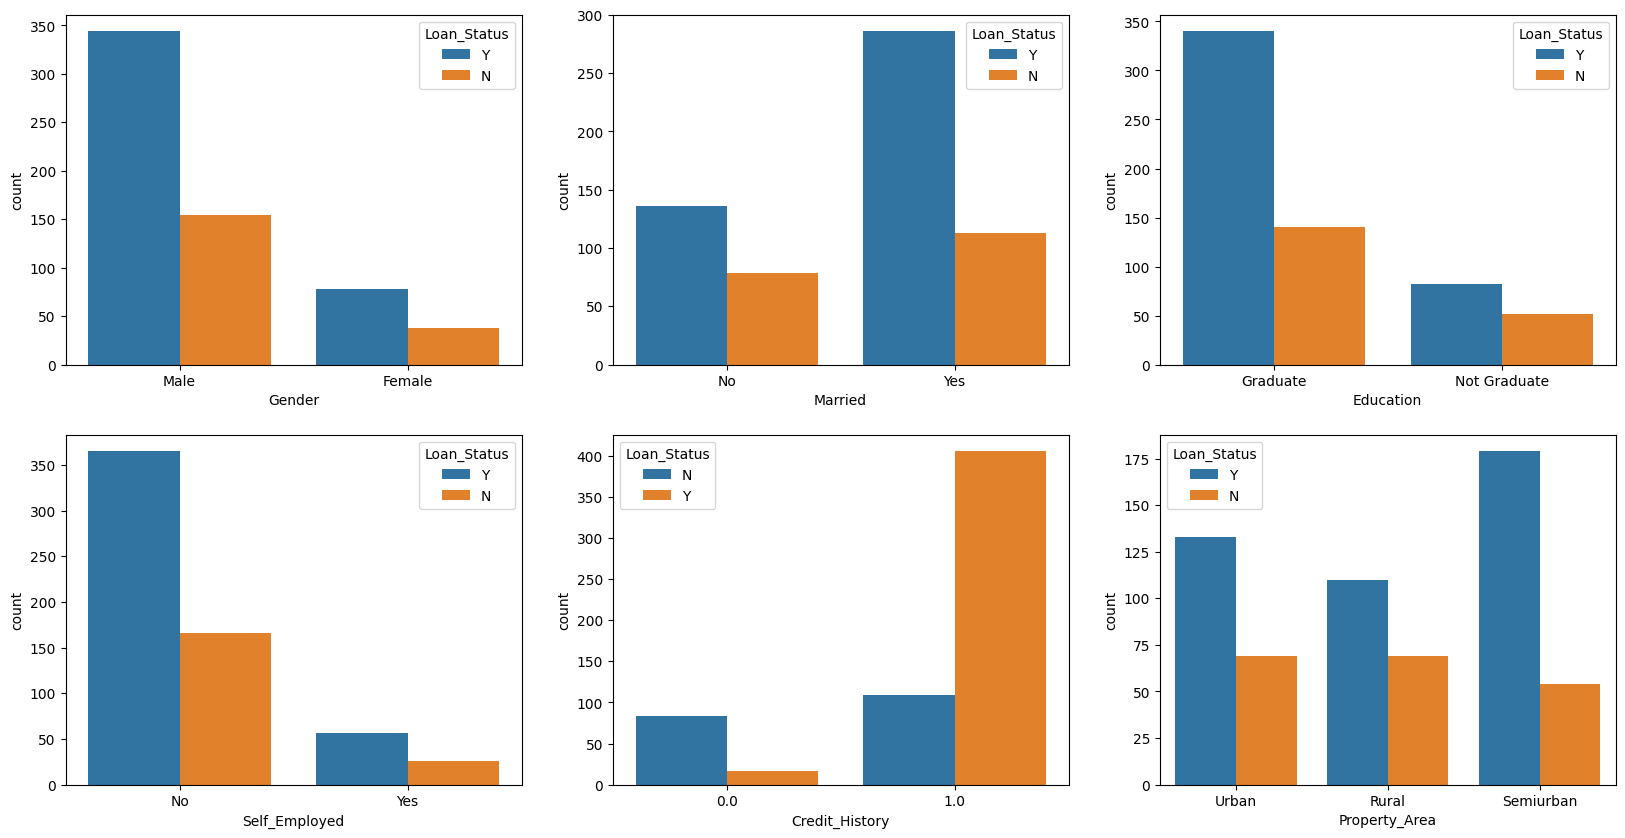

In [ ]:
# Bivariate Analysis for categorical variables
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

Loan_Status_counts = (loan1['Loan_Status'].value_counts())
print(Loan_Status_counts)

Gender_counts = (loan1['Gender'].value_counts())
print(Gender_counts)
sns.countplot(x = loan1['Gender'], hue = loan1['Loan_Status'], ax = axes[0, 0])  #x = loan1['Gender']:Specifies that the x-axis should represent the Gender column from the loan1 DataFrame.
                                                                                 #hue = loan1['Loan_Status']:break down the count for each gender by the Loan_Status column.
                                                                                 ##ax=axes[0, 0]:Places this plot in the first subplot, which is located in the first row (0) and first column (0) of the grid.
axes[0, 0].set_title('Loan Status by Gender')

Married_counts = (loan1['Married'].value_counts())
print(Married_counts)
sns.countplot(x = loan1['Married'], hue = loan1['Loan_Status'], ax = axes[0, 1])
axes[0, 1].set_title('Loan Status by Marital Status')

Education_counts = (loan1['Education'].value_counts())
print(Education_counts)
sns.countplot(x = loan1['Education'], hue = loan1['Loan_Status'], ax = axes[0,2])
axes[0, 2].set_title('Loan Status by Education')

Self_Employed_counts = (loan1['Self_Employed'].value_counts())
print(Self_Employed_counts)
sns.countplot(x = loan1['Self_Employed'], hue = loan1['Loan_Status'], ax = axes[1, 0])
axes[1, 0].set_title('Loan Status by Employment Status')

Credit_History_counts = (loan1['Credit_History'].value_counts())
print(Credit_History_counts)
sns.countplot(x = loan1['Credit_History'], hue = loan1['Loan_Status'], ax = axes[1, 1])
axes[1, 1].set_title('Loan Status by Credit History')

Property_Area_counts = (loan1['Property_Area'].value_counts())
print(Property_Area_counts)
sns.countplot(x = loan1['Property_Area'], hue = loan1['Loan_Status'], ax = axes[1, 2])
axes[1, 2].set_title('Loan Status by Property Area')
plt.show()

Those who are married have a higher likelihood than single persons of having their loan application accepted.

In comparison to men, women have far lower probability of having their loan applications granted.

Candidates with a 1 credit history are more likely to get approved for a loan.

<ipython-input-19-8a31dbf74c5a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan1['Applicant_Income'], ax = axes [0,0])
<ipython-input-19-8a31dbf74c5a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan1['Log_of_Applicant_Income'], ax = axes [0,1])
<ipython-input-19-8a31dbf74c5a>:7: User

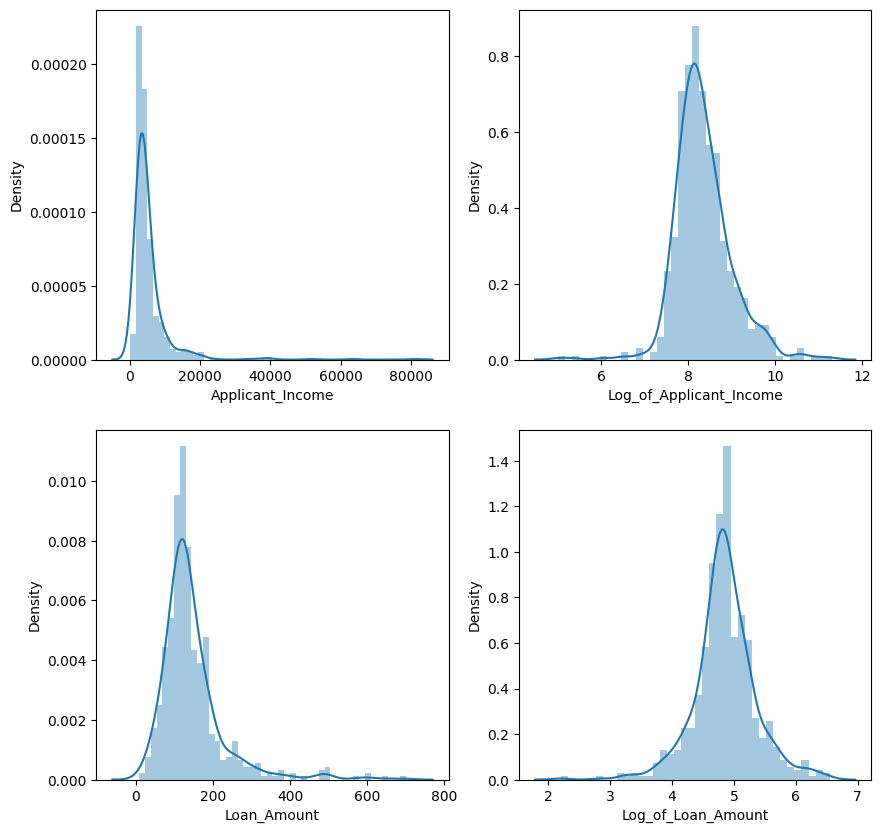

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

sns.distplot(loan1['Applicant_Income'], ax = axes [0,0])
loan1['Log_of_Applicant_Income'] = np.log(loan1['Applicant_Income'])       #The logarithm transformation is often used to reduce the skewness of data, especially when dealing with income, which can vary widely.
sns.distplot(loan1['Log_of_Applicant_Income'], ax = axes [0,1])

sns.distplot(loan1['Loan_Amount'], ax = axes [1,0])
loan1['Log_of_Loan_Amount'] = np.log(loan1['Loan_Amount'])
sns.distplot(loan1['Log_of_Loan_Amount'], ax = axes [1,1])
plt.show()

Because of a small number of people with really high salaries pushing the mean to the right, the applicant income distribution is strongly right biassed. It looks like the median income is around 10,000. Most people's salaries fall within a narrow range, as seen by the relatively tiny interquartile gap between the first and third quartiles. A few outliers stand in for borrowers with much greater salaries that request loans.

A little right slant also exists in the loan amount distribution, albeit not as much as in the applicant's income. The average loan amount is around $100. There may be a smaller range of loan values since the iqr for loan amounts is lower than the iqr for applicant income. A small number of outliers indicate loans with noticeably larger sums.

The distribution appears to be considerably closer to normal now that the log has been taken, and the impact of the extreme numbers has decreased.

In [ ]:
# drop Log_of_Loan_Amount, Log_of_Applicant_Income

loan1 = loan1.drop(['Log_of_Loan_Amount', 'Log_of_Applicant_Income'], axis=1)
loan1.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Outliers Treatment

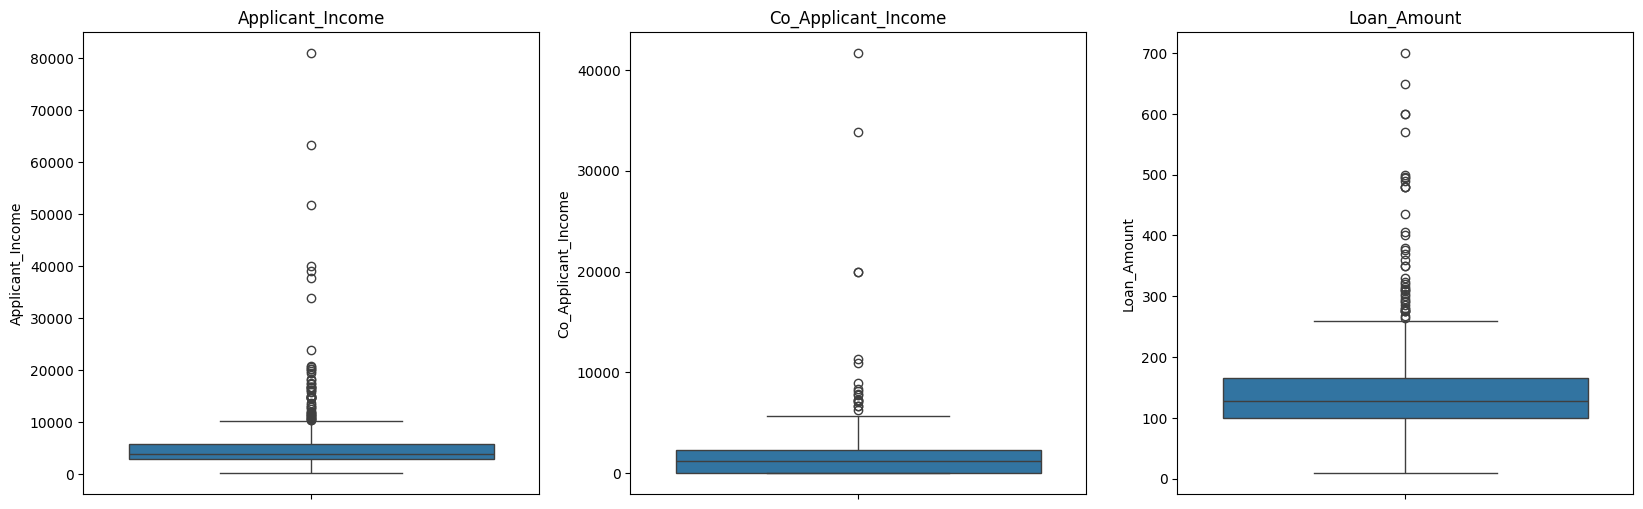

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

sns.boxplot(y=loan1['Applicant_Income'], ax=axes[0])
axes[0].set_title('Applicant_Income')

sns.boxplot(y=loan1['Co_Applicant_Income'], ax=axes[1])
axes[1].set_title('Co_Applicant_Income')

sns.boxplot(y=loan1['Loan_Amount'], ax=axes[2])
axes[2].set_title('Loan_Amount')

plt.show()

In [ ]:
# Remove outliers using IQR method
def outlier_iqr(loan1, column):
    Q1 = loan1[column].quantile(0.25)
    Q3 = loan1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = loan1[(loan1[column] < lower_bound) | (loan1[column] > upper_bound)]
    return len (outliers), lower_bound, upper_bound
applicant_income_outliers_iqr, applicant_income_lower_bound, applicant_income_upper_bound = outlier_iqr(loan1, 'Applicant_Income')
coapplicant_income_outliers_iqr, coapplicant_income_lower_bound, coapplicant_income_upper_bound = outlier_iqr(loan1, 'Co_Applicant_Income')
loan_amount_outliers_iqr, loan_amount_lower_bound, loan_amount_upper_bound = outlier_iqr(loan1, 'Loan_Amount')
applicant_income_outliers_iqr, coapplicant_income_outliers_iqr, loan_amount_outliers_iqr

(50, 18, 41)

In [ ]:
# Remove outliers using 2 sigma method
def outlier_2sigma(loan1, column):
    mean = loan1[column].mean()
    std = loan1[column].std()
    lower_bound = mean - 2 * std
    upper_bound = mean + 2 * std
    outliers = loan1[(loan1[column] < lower_bound) | (loan1[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound
applicant_income_outliers_2sigma, applicant_income_lower_bound, applicant_income_upper_bound = outlier_2sigma(loan1, 'Applicant_Income')
coapplicant_income_outliers_2sigma, coapplicant_income_lower_bound, coapplicant_income_upper_bound = outlier_2sigma(loan1, 'Co_Applicant_Income')
loan_amount_outliers_2sigma, loan_amount_lower_bound, loan_amount_upper_bound = outlier_2sigma(loan1, 'Loan_Amount')
applicant_income_outliers_2sigma, coapplicant_income_outliers_2sigma, loan_amount_outliers_2sigma

(16, 11, 25)

In [ ]:
# Remove outliers using 3 sigma method
def outlier_3sigma(loan1, column):
    mean = loan1[column].mean()
    std = loan1[column].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    outliers = loan1[(loan1[column] < lower_bound) | (loan1[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound
applicant_income_outliers_3sigma, applicant_income_lower_bound, applicant_income_upper_bound = outlier_3sigma(loan1, 'Applicant_Income')
coapplicant_income_outliers_3sigma, coapplicant_income_lower_bound, coapplicant_income_upper_bound = outlier_3sigma(loan1, 'Co_Applicant_Income')
loan_amount_outliers_3sigma, loan_amount_lower_bound, loan_amount_upper_bound = outlier_3sigma(loan1, 'Loan_Amount')
applicant_income_outliers_3sigma, coapplicant_income_outliers_3sigma, loan_amount_outliers_3sigma

(8, 6, 15)

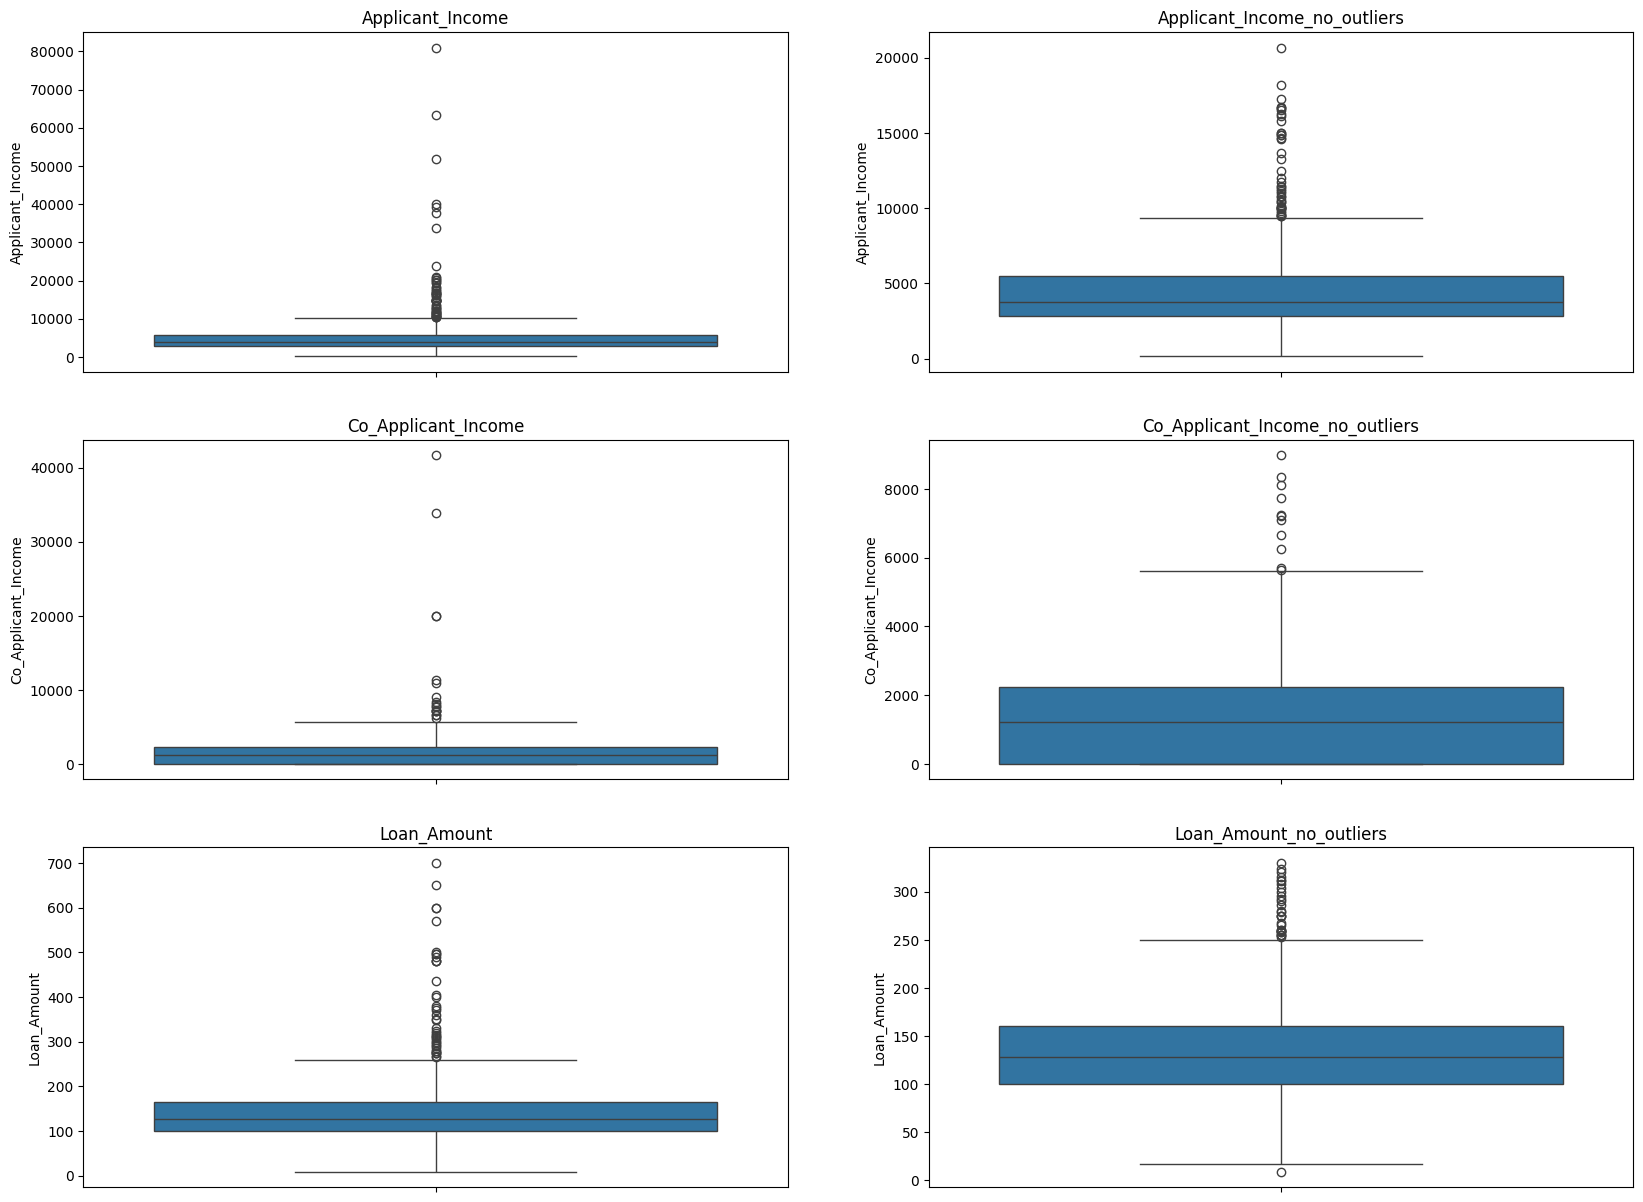

In [ ]:
def remove_outliers_3sigma(loan1, column):
    mean = loan1[column].mean()
    std = loan1[column].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    return loan1[(loan1[column] >= lower_bound) & (loan1[column] <= upper_bound)]

loan1_no_outliers = loan1.copy()
loan1_no_outliers = remove_outliers_3sigma(loan1_no_outliers, 'Applicant_Income')
loan1_no_outliers = remove_outliers_3sigma(loan1_no_outliers, 'Co_Applicant_Income')
loan1_no_outliers = remove_outliers_3sigma(loan1_no_outliers, 'Loan_Amount')

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

sns.boxplot(y='Applicant_Income', data = loan1, ax=axes[0, 0])
axes[0,0].set_title('Applicant_Income')
sns.boxplot(y='Applicant_Income', data = loan1_no_outliers, ax=axes[0, 1])
axes[0,1].set_title('Applicant_Income_no_outliers')

sns.boxplot(y='Co_Applicant_Income', data = loan1, ax=axes[1, 0])
axes[1,0].set_title('Co_Applicant_Income')
sns.boxplot(y='Co_Applicant_Income', data = loan1_no_outliers, ax=axes[1, 1])
axes[1,1].set_title('Co_Applicant_Income_no_outliers')

sns.boxplot(y='Loan_Amount', data = loan1, ax=axes[2,0])
axes[2,0].set_title('Loan_Amount')
sns.boxplot(y='Loan_Amount', data = loan1_no_outliers, ax=axes[2,1])
axes[2,1].set_title('Loan_Amount_no_outliers')

plt.show()

In [ ]:
loan1_no_outliers.shape

(587, 12)

In [ ]:
loan1 = loan1_no_outliers.copy()
loan1

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
# Using Label Encoder
columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for column in columns:
    label_encoder = LabelEncoder()
    loan1[column] = label_encoder.fit_transform(loan1[column])
loan1.head()



,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


The code uses a for loop to iterate over each column name in the columns list.

For each column, a new instance of LabelEncoder from the sklearn.preprocessing module is created. The LabelEncoder is used to convert categorical labels into numerical labels.

fit_transform(): This method combines two steps:
1.   Fit: The LabelEncoder learns the mapping from unique categorical values to numerical labels based on the data in the column.
2.   Transform: The original categorical values in the column are then replaced by their corresponding numerical labels.

In [ ]:
loan1.dtypes

,0
Gender,int64
Married,int64
Dependents,int64
Education,int64
Self_Employed,int64
Applicant_Income,int64
Co_Applicant_Income,float64
Loan_Amount,float64
Loan_Amount_Term,float64
Credit_History,float64


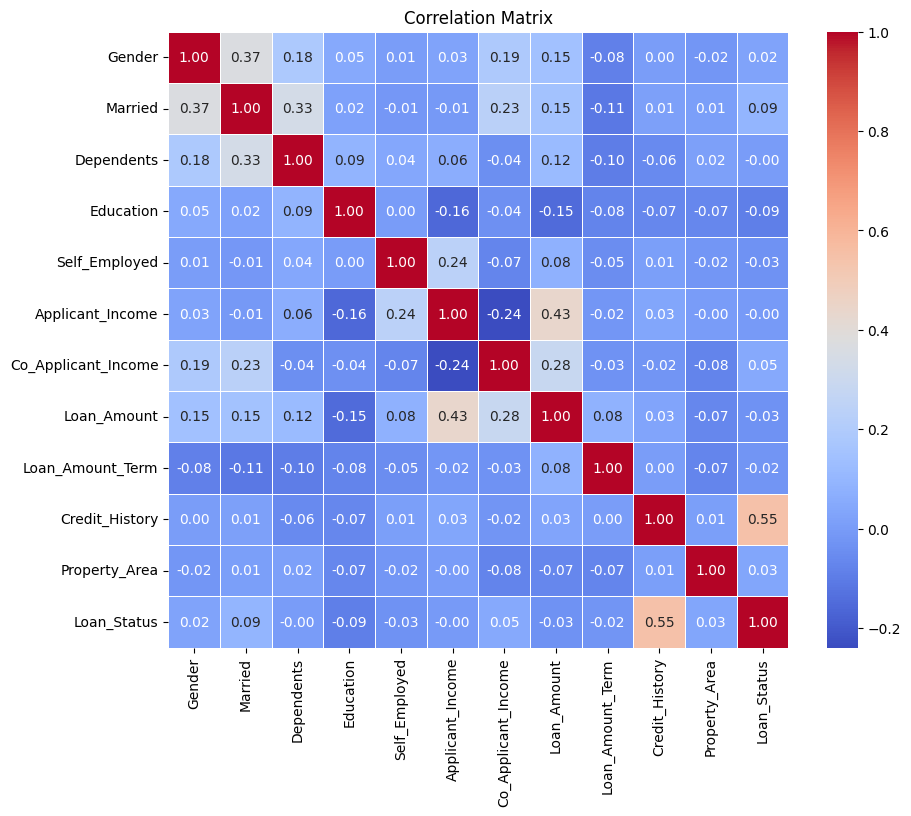

In [ ]:
# Correlation Matrix
numeric_columns = loan1.select_dtypes(include = ['float64', 'int64'])      #filters the DataFrame loan1 to include only columns with data types float64 and int64.
correlation_matrix = numeric_columns.corr()                                #a new DataFrame that contains only the numerical columns from the original loan1 DataFrame.
                                                                           #The .corr() method calculates the correlation coefficients between pairs of numerical columns in the numeric_columns DataFrame.
correlation_matrix

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)  #correlation_matrix: The data to be visualized is the correlation matrix computed earlier.
                                                                                         #annot=True: Annotates each cell in the heatmap with the correlation coefficient value.
                                                                                         #fmt='.2f': Formats the annotation to display the correlation coefficients with two decimal places.
                                                                                         #cmap='coolwarm': Specifies the color map to be used. The 'coolwarm' color map ranges from cool colors (like blue for negative correlations) to warm colors (like red for positive correlations).
                                                                                         #linewidths=0.5: Sets the width of the lines that separate the cells in the heatmap.
plt.title('Correlation Matrix')
plt.show()

The most correlate variables are **Applicant Income - Loan Amount**, **Credit Histroy - Loan Status**, and **Loan Amount - Coaaplicant Income**.

 The correlation coefficient is a measure of linear correlation between two variables, ranging from -1 to 1: 1 indicates a perfect positive correlation. -1 indicates a perfect negative correlation. 0 indicates no linear correlation.

## Data Balancing

In [ ]:
pip install -U imbalanced-learn

In [ ]:
x = loan1.drop(['Loan_Status'], axis = 1)
y = loan1['Loan_Status']

In [ ]:
Loan_approve = loan1[loan1['Loan_Status'] == 1]
Loan_not_approve = loan1[loan1['Loan_Status'] == 0]
print(Loan_approve.shape, Loan_not_approve.shape)

(406, 12) (181, 12)


In [ ]:
over_sampling = RandomOverSampler(random_state=42)
x_data, y_data = over_sampling.fit_resample(x, y)           #x_data: A new feature matrix that includes the original samples plus the synthetic samples for the minority class.
                                                            #y_data: A new target array that includes the original targets plus the corresponding labels for the synthetic samples.
x_data.shape, y_data.shape

((812, 11), (812,))

Oversampling is a technique used to address class imbalance in a dataset. When one class (the majority class) has significantly more samples than another class (the minority class), it can lead to biased models. Oversampling creates new instances of the minority class to balance the dataset. RandomOverSampler achieves this by randomly duplicating samples from the minority class until the number of samples in both classes is equal.

In [ ]:
y_data.value_counts()

,count
Loan_Status,
1,406
0,406


In [ ]:
loan1_new = pd.concat([x_data, y_data], axis = 1)

In [ ]:
loan1 = loan1_new.copy()
loan1

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
807,1,0,0,0,0,3583,0.0,96.0,360.0,1.0,2,0
808,1,1,0,0,0,3593,4266.0,132.0,180.0,0.0,0,0
809,1,1,1,1,0,4050,5302.0,138.0,360.0,1.0,0,0
810,0,0,1,0,0,5417,0.0,143.0,480.0,0.0,2,0


## Feature Selection Method

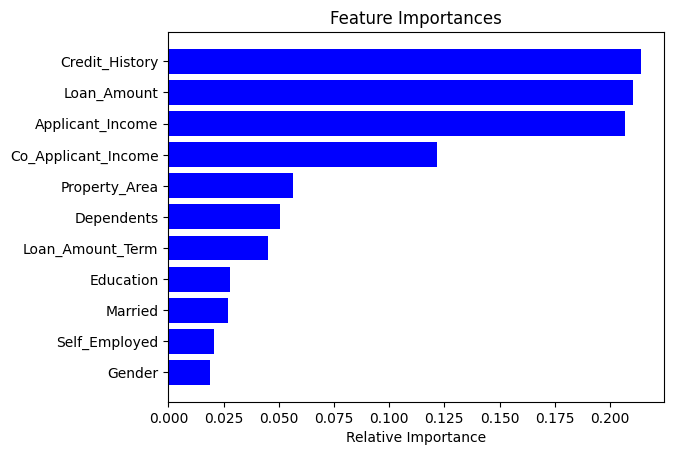

In [ ]:
rand_clf = RandomForestClassifier(random_state = 42) #RandomForestClassifier is a machine learning model that uses an ensemble of decision trees to make predictions.
                                                     #random_state=42: Setting a random seed ensures the results are reproducible. The number 42 is arbitrary and can be any integer.
rand_clf.fit(x_data, y_data)

features = x.columns                           #x.columns retrieves the names of the features (column names) from the original dataset x.
importances = rand_clf.feature_importances_    #rand_clf.feature_importances_ gives the importance of each feature in making predictions.
indices = np.argsort(importances)              #np.argsort(importances) returns the indices that would sort the importances array in ascending order.

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')  #range(len(indices)) creates a sequence from 0 to n-1, where n is the number of features. This sequence is used for the y-axis positions of the bars.
                                                                                #importances[indices] is the array of feature importances sorted in ascending order. These values determine the length of each bar.
                                                                                #color='b' sets the color of the bars to blue.
                                                                                #align='center' centers the bars on the y-ticks.
plt.yticks(range(len(indices)), [features[i] for i in indices])                 #plt.yticks(...) sets the labels on the y-axis, range(len(indices)) specifies the positions of the labels.
                                                                                #[features[i] for i in indices] creates a list of feature names sorted according to their importance. This ensures that the labels correspond to the correct bars in the chart.
plt.xlabel('Relative Importance')
plt.show()




The importance values are calculated based on how much each feature reduces the impurity (such as Gini impurity) in the decision trees that make up the random forest.
importances is a numpy array where each element corresponds to the importance of a feature.

indices is a numpy array of indices that will allow you to access the features from least important to most important.

## Model Building

In [ ]:
# Splitting the data set into dependent and independent variable
x= loan1.drop(['Education', 'Married', 'Self_Employed', 'Gender', 'Loan_Status'], axis = 1)
y= loan1['Loan_Status']

In [ ]:
x

,Dependents,Applicant_Income,Co_Applicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
0,0,5849,0.0,128.0,360.0,1.0,2
1,1,4583,1508.0,128.0,360.0,1.0,0
2,0,3000,0.0,66.0,360.0,1.0,2
3,0,2583,2358.0,120.0,360.0,1.0,2
4,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...
807,0,3583,0.0,96.0,360.0,1.0,2
808,0,3593,4266.0,132.0,180.0,0.0,0
809,1,4050,5302.0,138.0,360.0,1.0,0
810,1,5417,0.0,143.0,480.0,0.0,2


In [ ]:
# Dividing the dependent and independent variable into train and test set (25-75 split)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Logistic Regression
logistic= LogisticRegression()
logistic.fit(x_train, y_train)                              #trains the logistic regression model using the training data (x_train and y_train).
                                                            #The fit method takes the features (x_train) and the corresponding labels (y_train) to learn the relationship between them.
y_pred_LR = logistic.predict(x_test)                        #predict the labels for the test data (x_test). The predictions are stored in the variable y_pred_LR.
accuracy_LR = accuracy_score(y_test, y_pred_LR)             #calculate how many of the predicted labels (y_pred_LR) match the actual labels (y_test). The result is stored in the variable accuracy_LR.
print("Accuracy of Logistic Regression:", accuracy_LR)


Accuracy of Logistic Regression: 0.6932515337423313


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Crossvalidation
#The cross_val_score function is imported from the sklearn.model_selection module.
#This function evaluates the model's performance by splitting the dataset into multiple folds and computing scores for each fold.
cv_scores = cross_val_score(logistic, x, y, cv=5)               #cv=5 specifies that the data should be split into 5 folds. This means the data is divided into 5 subsets;
                                                                #the model is trained on 4 of these subsets and tested on the remaining one. This process is repeated 5 times, each time with a different fold as the test set.
print("Cross-validation scores:", cv_scores)                    #Cross-validation scores: prints the array of scores obtained from the cross-validation process.
                                                                #Each score represents the performance (e.g., accuracy) of the model on one of the 5 folds.
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.71779141 0.71779141 0.7345679  0.7345679  0.64197531]
Mean cross-validation score: 0.7093387866394002


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

cross_val_score is used to perform cross-validation with the logistic regression model (logistic) on the entire dataset (x for features and y for labels).

In [ ]:
# stratified k fold cross validation
from sklearn.model_selection import StratifiedKFold

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)     #n_splits=5 specifies that the data should be divided into 5 folds.
                                                                     #shuffle=True indicates that the data should be shuffled before splitting, which helps in creating more random and representative folds.
                                                                     #random_state=42 ensures that the shuffling is reproducible.
# Perform Stratified K-Fold Cross-Validation
cv_scores = []                                                       #cv_scores = [] This initializes an empty list cv_scores to store the accuracy scores from each fold of the cross-validation.
for train_index, test_index in skf.split(x, y):                      #The skf.split(x, y) method generates indices for training and test sets for each fold. It iterates through these indices.
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]        #x_train and x_test are created by selecting rows from x using the training and test indices, respectively. Similarly, y_train and y_test are created from y.
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    m1 = LogisticRegression()                                        #A new LogisticRegression model is instantiated for each fold.
    m1.fit(x_train, y_train)                                         #The fit method trains the model using the training data (x_train and y_train).
    y_pred_LR = m1.predict(x_test)                                   #Predictions are made on x_test using the predict method.

    accuracy = accuracy_score(y_test, y_pred_LR)                     #The accuracy_score function calculates the accuracy of the predictions (y_pred_LR) compared to the true labels (y_test).
    cv_scores.append(accuracy)                                       #The accuracy score is appended to the cv_scores list.

# Print results
print("Stratified Cross-validation scores:", cv_scores)
print("Mean Stratified cross-validation score:", np.mean(cv_scores))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Stratified Cross-validation scores: [0.7484662576687117, 0.6687116564417178, 0.6728395061728395, 0.7283950617283951, 0.7345679012345679]
Mean Stratified cross-validation score: 0.7105960766492465


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


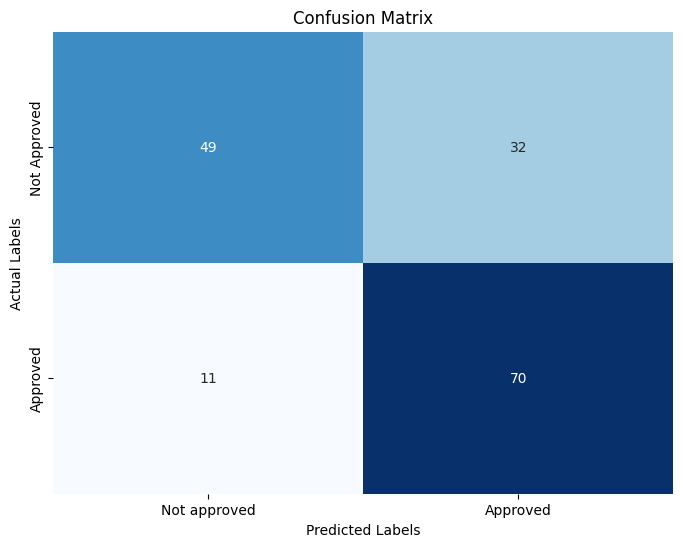

In [ ]:
# confusion matrix
#The confusion_matrix function from the sklearn.metrics module computes the confusion matrix for the true labels (y_test) and the predicted labels (y_pred_LR).
#The confusion matrix is a table used to evaluate the performance of a classification model by showing the number of correct and incorrect predictions for each class.
cm = confusion_matrix(y_test, y_pred_LR)         #cm is the confusion matrix data to be visualized.
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels= ['Not approved', 'Approved'], yticklabels= ['Not Approved', 'Approved'])
#annot=True adds numerical annotations to each cell in the heatmap, so the actual numbers from the confusion matrix will be displayed.
#fmt='d' specifies that the annotations should be formatted as integers.
#cmap='Blues' sets the color map of the heatmap to a blue gradient.
#cbar=False hides the color bar (which indicates the color scale) from the plot.
plt.xlabel('Predicted Labels')                  #xticklabels=['Not approved', 'Approved'] and yticklabels=['Not Approved', 'Approved'] label the x and y axes with the class names, respectively
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

sns.heatmap is a function from the seaborn library that creates a heatmap visualization.

In [ ]:
# Decision tree classifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)                         #The fit method trains the decision tree classifier using the training data (x_train for features and y_train for labels)
y_pred_DT = decision_tree.predict(x_test)                   #After the model is trained, decision_tree.predict(x_test) uses it to predict the labels for the test data (x_test).
accuracy_DT = accuracy_score(y_test, y_pred_DT)             #The accuracy_score function calculates the accuracy of the model's predictions.
                                                            #It compares the predicted labels (y_pred_DT) with the actual labels (y_test) and computes the proportion of correct predictions.
print("Accuracy of Decision Tree Classifier:", accuracy_DT)

Accuracy of Decision Tree Classifier: 0.8518518518518519


In [ ]:
# Cross-validation
cv_scores = cross_val_score(decision_tree, x, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.87116564 0.82822086 0.82716049 0.82098765 0.90740741]
Mean cross-validation score: 0.850988411724608


In [ ]:
# Random forest classifier

random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)                        #The fit method trains the random forest classifier using the training data (x_train for features and y_train for labels).
                                                           #The model learns from the training data to build multiple decision trees and aggregate their predictions.
y_pred_RF = random_forest.predict(x_test)                  # uses to predict the labels for the test data (x_test). The predictions are stored in the variable y_pred_RF.
accuracy_RF = accuracy_score(y_test, y_pred_RF)            #The accuracy_score function calculates the accuracy of the model's predictions.
                                                           #It compares the predicted labels (y_pred_RF) with the actual labels (y_test) and computes the proportion of correct predictions.
print("Accuracy of Random Forest Classifier:", accuracy_RF)

Accuracy of Random Forest Classifier: 0.8765432098765432


In order for a random forest classifier to function, it builds numerous decision trees during training. In each split, a random subset of features and a random portion of data are used to build the tree. As the data set has already been divided, cross-validation is not necessary.

In [ ]:
# KN neighbor classifier

kN_neighbors = KNeighborsClassifier()
kN_neighbors.fit(x_train, y_train)                     #The fit method trains the KNN classifier using the training data (x_train for features and y_train for labels).
                                                       #The model learns from the training data to make predictions based on the nearest neighbors in the feature space.
y_pred_KN = kN_neighbors.predict(x_test)               #After the model is trained, kN_neighbors.predict(x_test) uses it to predict the labels for the test data (x_test).
                                                       #The predictions are stored in the variable y_pred_KN.
accuracy_KN = accuracy_score(y_test, y_pred_KN)        #the accuracy_score function from the sklearn.metrics module calculates the accuracy of the model's predictions.
                                                       #It compares the predicted labels (y_pred_KN) with the actual labels (y_test) and computes the proportion of correct predictions.
print("Accuracy of K Neighbors Classifier:", accuracy_KN)

Accuracy of K Neighbors Classifier: 0.5864197530864198


In [ ]:
# Cross-validation
cv_scores = cross_val_score(kN_neighbors, x, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.59509202 0.57668712 0.56790123 0.59876543 0.62962963]
Mean cross-validation score: 0.5936150874801182


In [ ]:
# Classification Report

def gen_classification_report(model_name, y_test, y_pred):
    report = classification_report(y_test, y_pred)
    print(f"Classification Report for {model_name}:\n{report}\n")

gen_classification_report(logistic, y_test, y_pred_LR)
gen_classification_report(decision_tree, y_test, y_pred_DT)
gen_classification_report(random_forest, y_test, y_pred_RF)
gen_classification_report(kN_neighbors, y_test, y_pred_KN)

Classification Report for LogisticRegression():
              precision    recall  f1-score   support

           0       0.82      0.60      0.70        81
           1       0.69      0.86      0.77        81

    accuracy                           0.73       162
   macro avg       0.75      0.73      0.73       162
weighted avg       0.75      0.73      0.73       162


Classification Report for DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.79      0.95      0.87        81
           1       0.94      0.75      0.84        81

    accuracy                           0.85       162
   macro avg       0.87      0.85      0.85       162
weighted avg       0.87      0.85      0.85       162


Classification Report for RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        81
           1       0.90      0.85      0.87        81

    accuracy                

In [ ]:
models_performance = {'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KN-Neighbour'],
        'Accuracy': [accuracy_LR, accuracy_DT, accuracy_RF, accuracy_KN]}

Loan1_comparison = pd.DataFrame(models_performance)
Loan1_comparison = Loan1_comparison.sort_values(by = 'Accuracy', ascending = False)
print (Loan1_comparison)

                 Model  Accuracy
2        Random Forest  0.876543
1        Decision Tree  0.851852
0  Logistic Regression  0.693252
3         KN-Neighbour  0.586420


## Fitting the model into test set

In [ ]:
loan2 = pd.read_csv('/content/drive/MyDrive/Data Brio academy/loan_prediction_test.csv')
loan2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [ ]:
loan2.shape

(367, 12)

In [ ]:
loan2.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
loneid_drop = loan2.drop(columns = 'Loan_ID', axis = 1)
loan2 = loneid_drop.copy()
loan2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
loan2.rename(columns = {'ApplicantIncome': 'Applicant_Income', 'CoapplicantIncome': 'Co_Applicant_Income', 'LoanAmount': 'Loan_Amount',}, inplace=True)
loan2.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Applicant_Income', 'Co_Applicant_Income', 'Loan_Amount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
loan2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               356 non-null    object 
 1   Married              367 non-null    object 
 2   Dependents           357 non-null    object 
 3   Education            367 non-null    object 
 4   Self_Employed        344 non-null    object 
 5   Applicant_Income     367 non-null    int64  
 6   Co_Applicant_Income  367 non-null    int64  
 7   Loan_Amount          362 non-null    float64
 8   Loan_Amount_Term     361 non-null    float64
 9   Credit_History       338 non-null    float64
 10  Property_Area        367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 34.4+ KB


## Missing Value Analysis

In [ ]:
loan2.isnull().sum()

,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6
Credit_History,29


In [ ]:
categorical_variables = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
numerical_variables = ['Loan_Amount', 'Loan_Amount_Term']

def find_missing_values(loan2, categorical_variables, Numerical_variables):
   for variable in categorical_variables:
       non_missing_variable = loan2[variable].dropna()
       if not non_missing_variable.empty:
           value_counts = non_missing_variable.value_counts(normalize=True)
           random_choice = np.random.choice(value_counts.index, size = len(loan2[variable]), p=value_counts.values)
           loan2[variable] = loan2[variable].fillna(pd.Series(random_choice, index = loan2.index))

   for variable in numerical_variables:
       median_value = loan2[variable].median()
       loan2[variable] = loan2[variable].fillna(median_value)

   return loan2

loan2 = find_missing_values(loan2, categorical_variables, numerical_variables)
print(loan2)

    Gender Married Dependents     Education Self_Employed  Applicant_Income  \
0     Male     Yes          0      Graduate            No              5720   
1     Male     Yes          1      Graduate            No              3076   
2     Male     Yes          2      Graduate            No              5000   
3     Male     Yes          2      Graduate            No              2340   
4     Male      No          0  Not Graduate            No              3276   
..     ...     ...        ...           ...           ...               ...   
362   Male     Yes         3+  Not Graduate           Yes              4009   
363   Male     Yes          0      Graduate            No              4158   
364   Male      No          0      Graduate            No              3250   
365   Male     Yes          0      Graduate            No              5000   
366   Male      No          0      Graduate           Yes              9200   

     Co_Applicant_Income  Loan_Amount  Loan_Amount_

In [ ]:
loan2.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
Applicant_Income,0
Co_Applicant_Income,0
Loan_Amount,0
Loan_Amount_Term,0
Credit_History,0


## Exploratory Data Analysis

Gender
Male      294
Female     73
Name: count, dtype: int64
Married
Yes    233
No     134
Name: count, dtype: int64
Dependents
0     207
2      62
1      58
3+     40
Name: count, dtype: int64
Education
Graduate        283
Not Graduate     84
Name: count, dtype: int64
Self_Employed
No     327
Yes     40
Name: count, dtype: int64
Property_Area
Urban        140
Semiurban    116
Rural        111
Name: count, dtype: int64


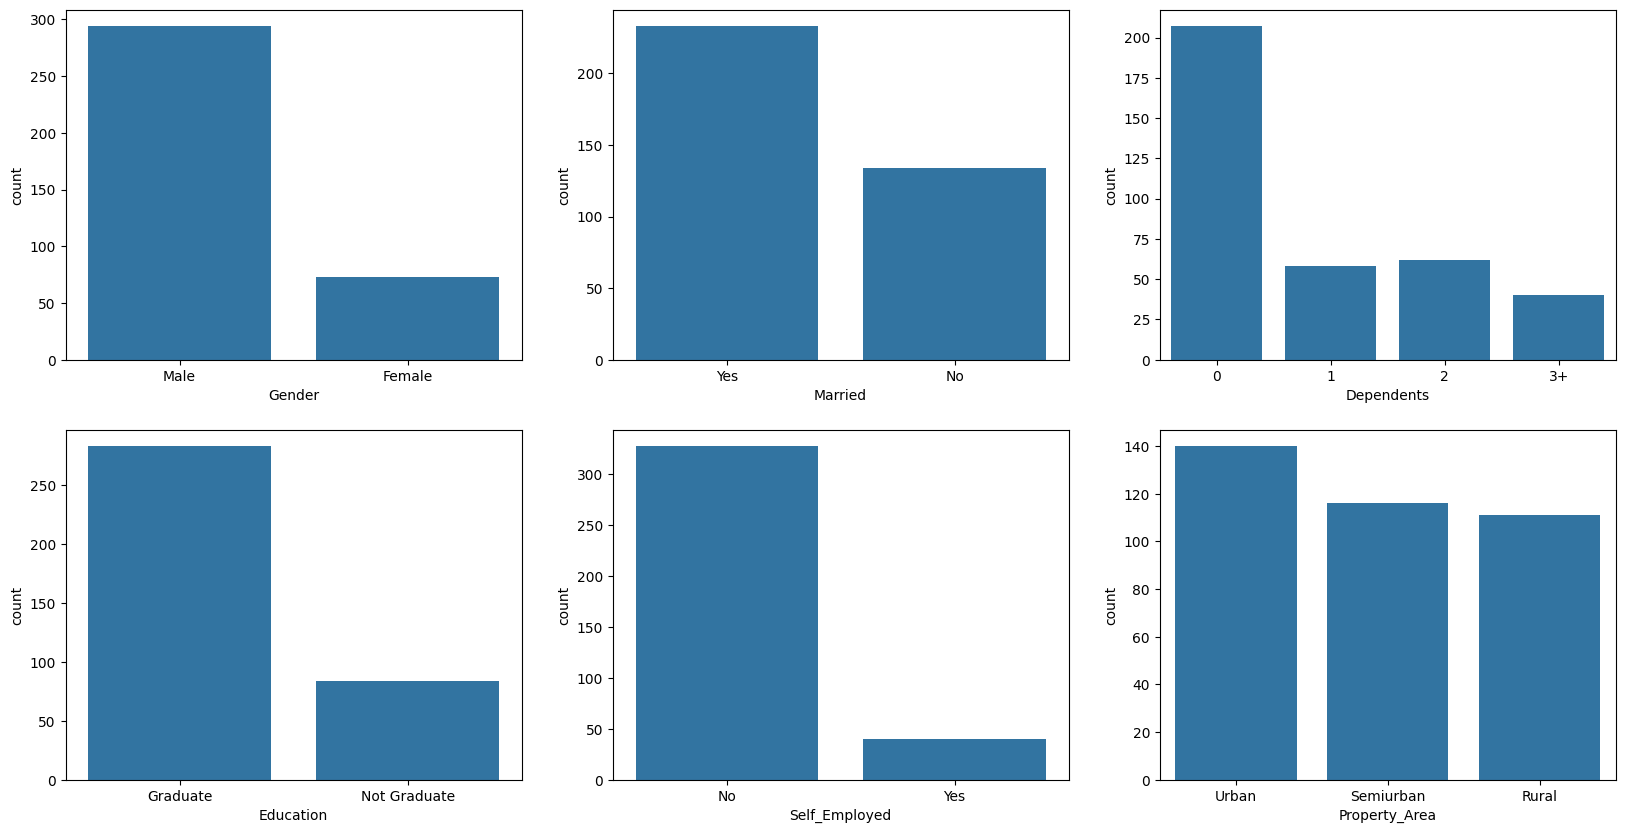

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

Gender_counts = (loan2['Gender'].value_counts())
print(Gender_counts)
sns.countplot(x='Gender', data=loan2, ax = axes[0, 0])
#plt.show()

Married_counts = (loan2['Married'].value_counts())
print(Married_counts)
sns.countplot(x='Married', data=loan2, ax = axes[0, 1])
#plt.show()

Dependents_counts = (loan2['Dependents'].value_counts())
print(Dependents_counts)
sns.countplot(x='Dependents', data=loan2, ax = axes[0, 2] )
#plt.show()

Education_counts = (loan2['Education'].value_counts())
print(Education_counts)
sns.countplot(x='Education', data=loan2, ax = axes[1, 0])
#plt.show()

Self_Employed_counts = (loan2['Self_Employed'].value_counts())
print(Self_Employed_counts)
sns.countplot(x='Self_Employed', data=loan2, ax = axes[1, 1])
#plt.show()

Property_Area_counts = (loan2['Property_Area'].value_counts())
print(Property_Area_counts)
sns.countplot(x='Property_Area', data=loan2, ax = axes[1, 2])

plt.show()

## Outliers Treatment

Text(0.5, 1.0, 'Loan_Amount')

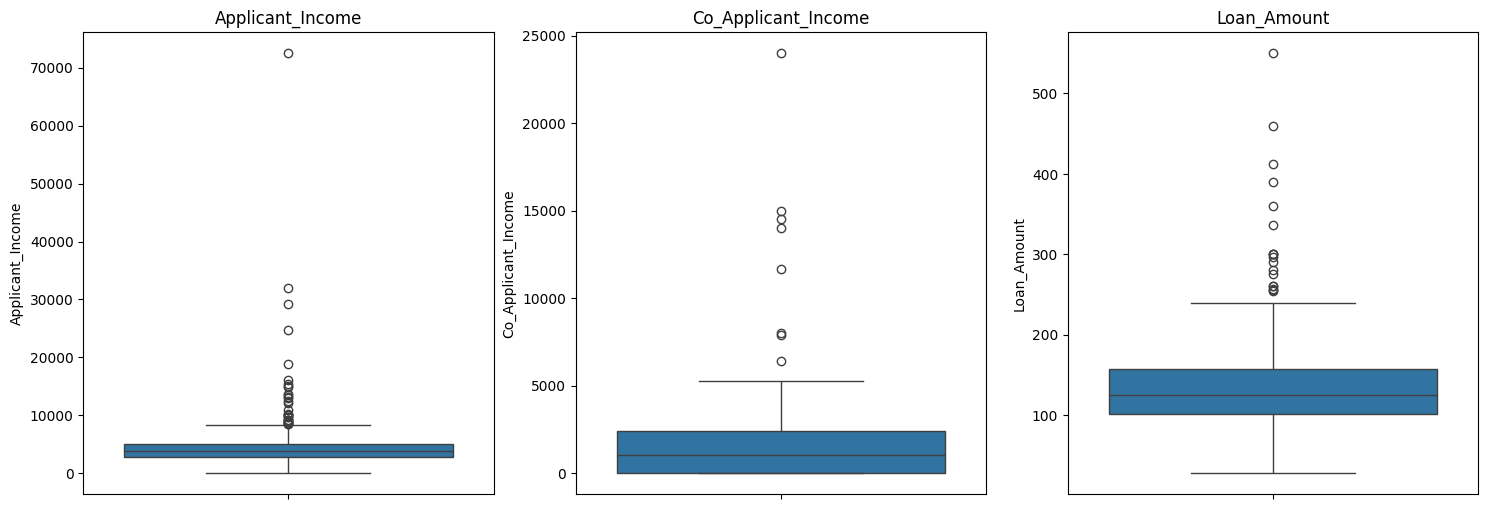

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

sns.boxplot(y=loan2['Applicant_Income'], ax=axes[0])
axes[0].set_title('Applicant_Income')
sns.boxplot(y=loan2['Co_Applicant_Income'], ax=axes[1])
axes[1].set_title('Co_Applicant_Income')
sns.boxplot(y=loan2['Loan_Amount'], ax=axes[2])
axes[2].set_title('Loan_Amount')

In [ ]:
columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area',]
for column in columns:
    labe2_encoder = LabelEncoder()
    loan2[column] = label_encoder.fit_transform(loan2[column])
loan2.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


## Fit The Model

In [ ]:
# Fit the model
loan2.prediction = random_forest.predict(loan2[['Dependents', 'Applicant_Income', 'Co_Applicant_Income', 'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']])

<ipython-input-42-bf8e0e2e83a6>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  loan2.prediction = random_forest.predict(loan2[['Dependents', 'Applicant_Income', 'Co_Applicant_Income', 'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']])


In [ ]:
loan2['Loan_Status(Predicted)'] = loan2.prediction
loan2.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status(Predicted)
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,1
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,1
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,1
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2,1
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,1


In [ ]:
loan2['Loan_Status(Predicted)'].value_counts()

,count
Loan_Status(Predicted),
1,267
0,100


In [ ]:
# Convert Loan_Status(Predicted) to Y and N

loan2['Loan_Status(Predicted)'] = loan2['Loan_Status(Predicted)'].replace({1: 'Y', 0: 'N'})
loan2.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status(Predicted)
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,Y
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,Y
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,Y
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2,Y
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,Y
